In [5]:
import torch
import matplotlib.pyplot as plt

In [2]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = torch.tensor([1.0]) # w的初值为1.0
w.requires_grad = True # 需要计算梯度

In [17]:
def forward(x):
    return x*w  # w是一个Tensor
 
 
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2

loss_list = []
print("predict (before training)", 4, forward(4).item())

predict (before training) 4 7.999998569488525


In [21]:
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        l =loss(x,y) # l是一个张量，tensor主要是在建立计算图 forward, compute the loss
        l.backward() #  backward,compute grad for Tensor whose requires_grad set to True
        print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.01 * w.grad.data   # 权重更新时，注意grad也是一个tensor
 
        w.grad.data.zero_() # after update, remember set the grad to zero
 
    print('progress:', epoch, l.item()) # 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
    loss_list.append(l.item())
    print(l.item())
print("predict (after training)", 4, forward(4).item())


	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 0 9.094947017729282e-13
9.094947017729282e-13
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 1 9.094947017729282e-13
9.094947017729282e-13
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 2 9.094947017729282e-13
9.094947017729282e-13
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 3 9.094947017729282e-13
9.094947017729282e-13
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 4 9.094947017729282e-13
9.094947017729282e-13
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 5 9.094947017729282e-13
9.094947017729282e-1

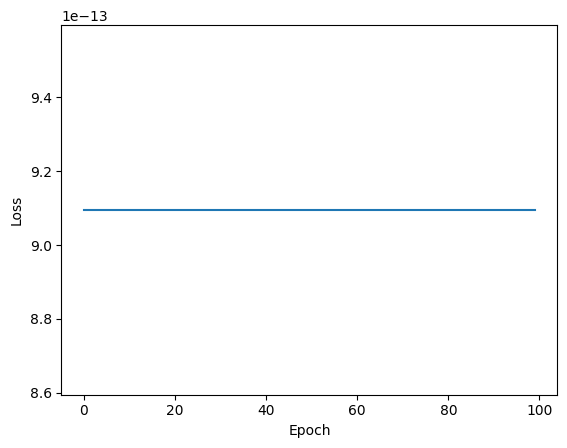

In [19]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()